# Logistic Regression with SGD Classifier - Homework

In this homework, we will implement Logistic Regression using the Stochastic Gradient Descent (SGD) optimizer. We will first implement the model from scratch and then use Scikit-learn's built-in tools to achieve the same goal. Finally, we will compare the results from both approaches.

## Dataset: heart.csv

The dataset used in this homework contains **13 features** and a **target variable**. The features are as follows:

- Age
- Sex
- Chest pain type
- Resting blood pressure
- Serum cholesterol
- Fasting blood sugar
- Resting electrocardiographic results
- Thalach (maximum heart rate achieved)
- Exercise induced angina
- Oldpeak
- Slope
- Vessels colored by fluoroscopy
- Thalassemia

### Target Variable:
- **Target**: 0 (No Heart Disease), 1 (Heart Disease)

We will extract these values from the dataset and use them to train and test our logistic regression models.


## Importing Necessary Libraries

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

Load the dataset with Pandas and display some rows.


In [91]:
# your code here

df = pd.read_csv('./heart.csv')
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [92]:
df.shape

(1025, 14)

In [93]:
df.dtypes

age                                int64
sex                               object
chest_pain_type                   object
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar               object
rest_ecg                          object
Max_heart_rate                     int64
exercise_induced_angina           object
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy     object
thalassemia                       object
target                             int64
dtype: object

# Displaying Count of Unique Values for Non-Numerical Columns #

As you can see, some columns contain non-numerical values. In this step, we will write code for each of these columns to display the unique values and the count of each value.


In [94]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Column: sex
sex
Male      713
Female    312
Name: count, dtype: int64

Column: chest_pain_type
chest_pain_type
Typical angina      497
Non-anginal pain    284
Atypical angina     167
Asymptomatic         77
Name: count, dtype: int64

Column: fasting_blood_sugar
fasting_blood_sugar
Lower than 120 mg/ml      872
Greater than 120 mg/ml    153
Name: count, dtype: int64

Column: rest_ecg
rest_ecg
ST-T wave abnormality           513
Normal                          497
Left ventricular hypertrophy     15
Name: count, dtype: int64

Column: exercise_induced_angina
exercise_induced_angina
No     680
Yes    345
Name: count, dtype: int64

Column: slope
slope
Flat           482
Downsloping    469
Upsloping       74
Name: count, dtype: int64

Column: vessels_colored_by_flourosopy
vessels_colored_by_flourosopy
Zero     578
One      226
Two      134
Three     69
Four      18
Name: count, dtype: int64

Column: thalassemia
thalassemia
Fixed Defect         544
Reversable Defect    410
Normal            

Displaying Count of Unique Values for Target Column

In [95]:
print("\nTarget column distribution:")
print(df['target'].value_counts())


Target column distribution:
target
1    526
0    499
Name: count, dtype: int64


 Convert Categorical Columns to Numerical Values



In [96]:
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.dtypes

age                                int64
sex                                int64
chest_pain_type                    int64
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar                int64
rest_ecg                           int64
Max_heart_rate                     int64
exercise_induced_angina            int64
oldpeak                          float64
slope                              int64
vessels_colored_by_flourosopy      int64
thalassemia                        int64
target                             int64
dtype: object

### Creating Train and Test Data

In [97]:
X = df.drop(columns='target')
y = df['target']
X.shape, y.shape

((1025, 13), (1025,))

In [98]:
# Split train and test with 80-20 proportion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train.shape, y_test.shape

((820,), (205,))

In [99]:
# Reshaping Target Variables for Matrix Computations
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

y_train.shape, y_test.shape

((820, 1), (205, 1))

## Feature Scaling

In this step, we will apply **Standard Scaling** to normalize the features of the training and test sets.

In [100]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Custom Logistic Regression Class

In this section, we implement a custom Logistic Regression classifier from scratch using **Stochastic Gradient Descent (SGD)**. The class `MyLogisticRegBinary` inherits from `BaseEstimator` and `ClassifierMixin` to integrate with Scikit-learn.
The model is designed to train efficiently with the SGD method and can be used for binary classification tasks.

In [ ]:
class MyLogisticRegBinary(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.params = {}
        self.verbose = 0
    def init_params(self, X):
        """Randomly initializing parameters for logistic regression.

        In this function, we initialize the slope coefficients and
        the intercept randomly using a normal distribution.

        """
        np.random.seed(42)
        n_features = X.shape[1]

        self.params['coef'] = np.random.randn(n_features, 1)

        self.params['intercept'] = np.random.randn(1, 1)

        if self.verbose:
            print("[INFO] Initialized parameters.")
            print(f"Shape of coefficient matrix: {self.params['coef'].shape}")
            print(f"Shape of intercept matrix: {self.params['intercept'].shape}")

    def get_logits(self, X, y=None):
        """Calculate logits for logistic regression.
        """
        if 'coef' not in self.params:
            self.init_params(X)

        return X @ self.params['coef'] + self.params['intercept']

    def predict_proba(self, X, y=None):
        """
        Compute probabilities for binary classification using the sigmoid function.
        The sigmoid function is defined as: 1 / (1 + exp(-logits)).
        """
        logits = self.get_logits(X)

        return 1 / (1 + np.exp(-logits))

    def fit(self, X, y, learning_rate=0.05, iterations=1000, verbose=0):
        """Train the logistic regression model using Stochastic Gradient Descent (SGD). """
        self.verbose = verbose

        if isinstance(X, pd.DataFrame):
            X = X.values

        self.init_params(X)
        m = X.shape[0]

        if verbose:
            print("[INFO] Training with Stochastic Gradient Descent ...")

        for i in range(1, iterations + 1):
            total_loss = 0

            indices = np.arange(m)
            np.random.shuffle(indices)

            for idx in indices:
                X_sample = X[idx].reshape(1, -1)
                y_sample = np.array([y[idx]])

                # Compute the probability (prediction) using the predict_proba function
                y_proba = self.predict_proba(X_sample)

                loss = - (y_sample * np.log(y_proba) + (1 - y_sample) * np.log(1 - y_proba))
                total_loss += loss

                # Compute the gradients (dW and db)
                dW = X_sample.T @ (y_proba - y_sample)
                db = (y_proba - y_sample)


                self.params['coef'] -= learning_rate * dW
                self.params['intercept'] -= learning_rate * db

            avg_loss = total_loss / m

            if verbose and (i == 1 or i % 10 == 0):
                print(f"\nIteration {i}/{iterations}", end=" ")
                print(f"Loss: {avg_loss}")

    def predict(self, X, threshold=0.5):
        """Make predictions using the logistic regression model.
        """
        y_proba = self.predict_proba(X)
        
        y_pred = (y_proba >= threshold).astype(int)

        return y_pred


In [102]:
my_log_reg = MyLogisticRegBinary()
my_log_reg.fit(X_train, y_train, learning_rate=0.01, iterations=50, verbose=1)

[INFO] Initialized parameters.
Shape of coefficient matrix: (13, 1)
Shape of intercept matrix: (1, 1)
[INFO] Training with Stochastic Gradient Descent ...

Iteration 1/50 Loss: [[0.75203557]]

Iteration 10/50 Loss: [[0.34894015]]

Iteration 20/50 Loss: [[0.34900326]]

Iteration 30/50 Loss: [[0.3485192]]

Iteration 40/50 Loss: [[0.3489008]]

Iteration 50/50 Loss: [[0.34844382]]


In [103]:
y_pred = my_log_reg.predict(X_test)
print("My implementation:")
print(accuracy_score(y_test, y_pred))

My implementation:
0.7902439024390244


### Plotting the Confusion Matrix

In this step, we compute and visualize the confusion matrix using a heatmap by seaborn

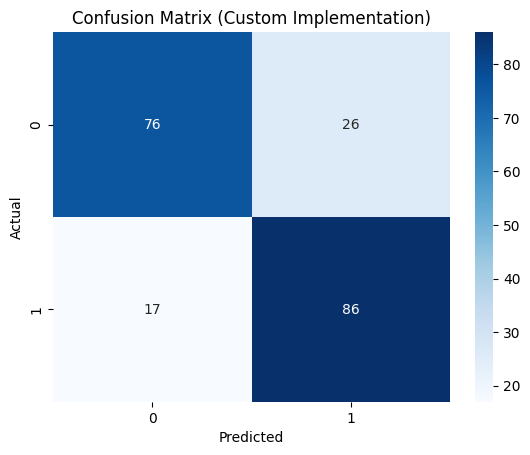

In [104]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Custom Implementation)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Using Scikit-Learn's Built-in SGDClassifier

In this section, we will use Scikit-learn's `SGDClassifier` to implement logistic regression with Stochastic Gradient Descent (SGD). This is a built-in implementation, which abstracts away the low-level details like parameter initialization and gradient updates.

In [105]:
sgd_classifier = SGDClassifier(
    loss='log_loss',
    learning_rate='constant',
    eta0=0.01,
    penalty=None,
    random_state=42
)

epochs = 50

for i in range(1, epochs + 1):
    # Update the model incrementally using the training data and true labels, adjusting the model parameters
    # based on the gradient of the loss function for one batch of data.
    sgd_classifier.partial_fit(X_train, y_train.ravel(), classes=np.unique(y))

    # Compute logistic_regression_loss
    y_proba = sgd_classifier.predict_proba(X_train)[:, 1].reshape(-1, 1)
    avg_loss = log_loss(y_train, y_proba)

    if i == 1 or i % 10 == 0:
        print(f"Epoch {i} - Loss: {avg_loss:.6f}")

Epoch 1 - Loss: 0.355359
Epoch 10 - Loss: 0.343744
Epoch 20 - Loss: 0.343734
Epoch 30 - Loss: 0.343734
Epoch 40 - Loss: 0.343734
Epoch 50 - Loss: 0.343734


In [106]:
sk_y_pred = sgd_classifier.predict(X_test)
print("Scikit-learn implementation:")
print(accuracy_score(y_test, sk_y_pred))

Scikit-learn implementation:
0.7951219512195122


### Confusion Matrix in Scikit-learn implementation

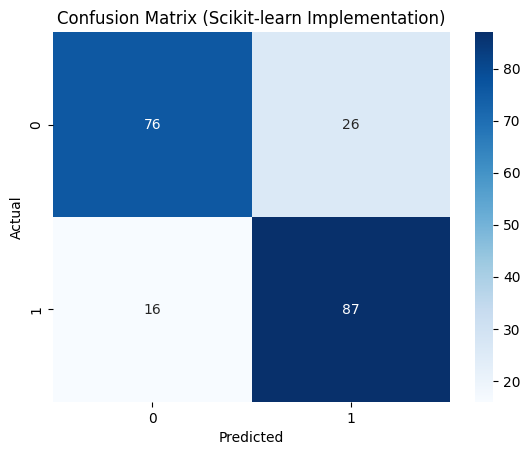

In [107]:
cm = confusion_matrix(y_test, sk_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Scikit-learn Implementation)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()